# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.

## Dataset Description

For this lab, I'm analyzing **Starbucks customer reviews** from ConsumerAffairs.com. The dataset contains customer reviews with ratings (1-5 stars), review text, location, and date information. This provides a good opportunity to explore what customers appreciate about Starbucks and what frustrates them through text analysis and sentiment visualization.

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import warnings
warnings.filterwarnings("ignore")

# Load the Starbucks reviews dataset
df = pd.read_csv('Starbucks_reviews.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nRating distribution:")
print(df['Rating'].value_counts().sort_index())

Dataset shape: (850, 6)

Column names:
['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']

First few rows:
       name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  
0                                      ['No Images']  
1                             

## Visualization 1: Word Cloud Comparison - Positive vs Negative Reviews

I'll create side-by-side word clouds to compare the language used in positive reviews (5 stars) versus negative reviews (1-2 stars). This will visually show what words appear most frequently in each sentiment category.

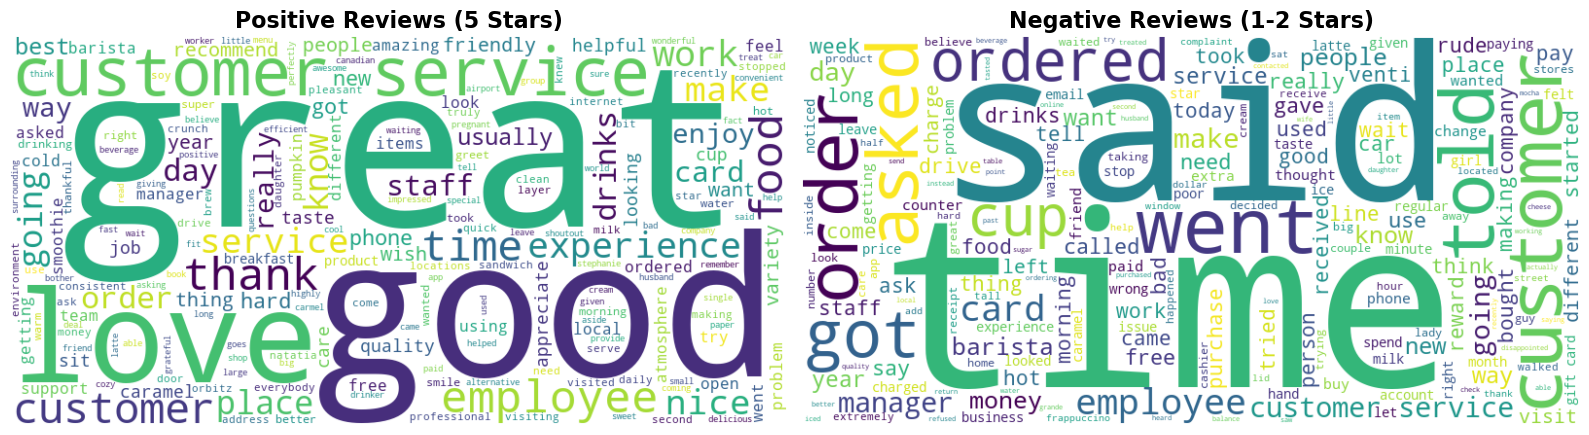

In [6]:
# Define stopwords to remove (including common but uninformative words)
additional_stopwords = {'starbucks', 'coffee', 'drink', 'store', 'location'}

# Separate positive (5 stars) and negative (1-2 stars) reviews
positive_reviews = ' '.join(df[df['Rating'] == 5]['Review'].astype(str))
negative_reviews = ' '.join(df[df['Rating'] <= 2]['Review'].astype(str))

# Process positive reviews
positive_words = positive_reviews.lower().split()
positive_words = [word.strip(string.punctuation) for word in positive_words 
                  if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]

# Process negative reviews
negative_words = negative_reviews.lower().split()
negative_words = [word.strip(string.punctuation) for word in negative_words 
                  if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
ax1.imshow(wordcloud_pos, interpolation='bilinear')
ax1.set_title('Positive Reviews (5 Stars)', fontsize=16, fontweight='bold')
ax1.axis('off')

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
ax2.imshow(wordcloud_neg, interpolation='bilinear')
ax2.set_title('Negative Reviews (1-2 Stars)', fontsize=16, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

**Analysis:** The word clouds reveal distinct themes in positive versus negative reviews. Positive reviews emphasize employee names and customer service ("employee", "order", "nice", "friendly", "service"), showing that great staff interactions drive satisfaction. Negative reviews focus on operational issues ("wait", "service", "order", "mobile", "card"), indicating that poor service speed, order accuracy, and payment problems are the main frustrations. The size differences show that positive reviewers talk about people while negative reviewers complain about processes.

## Visualization 2: Top Keywords Frequency Comparison

Bar charts showing the most frequent words in positive vs negative reviews, giving us a quantitative view of what matters most to customers.

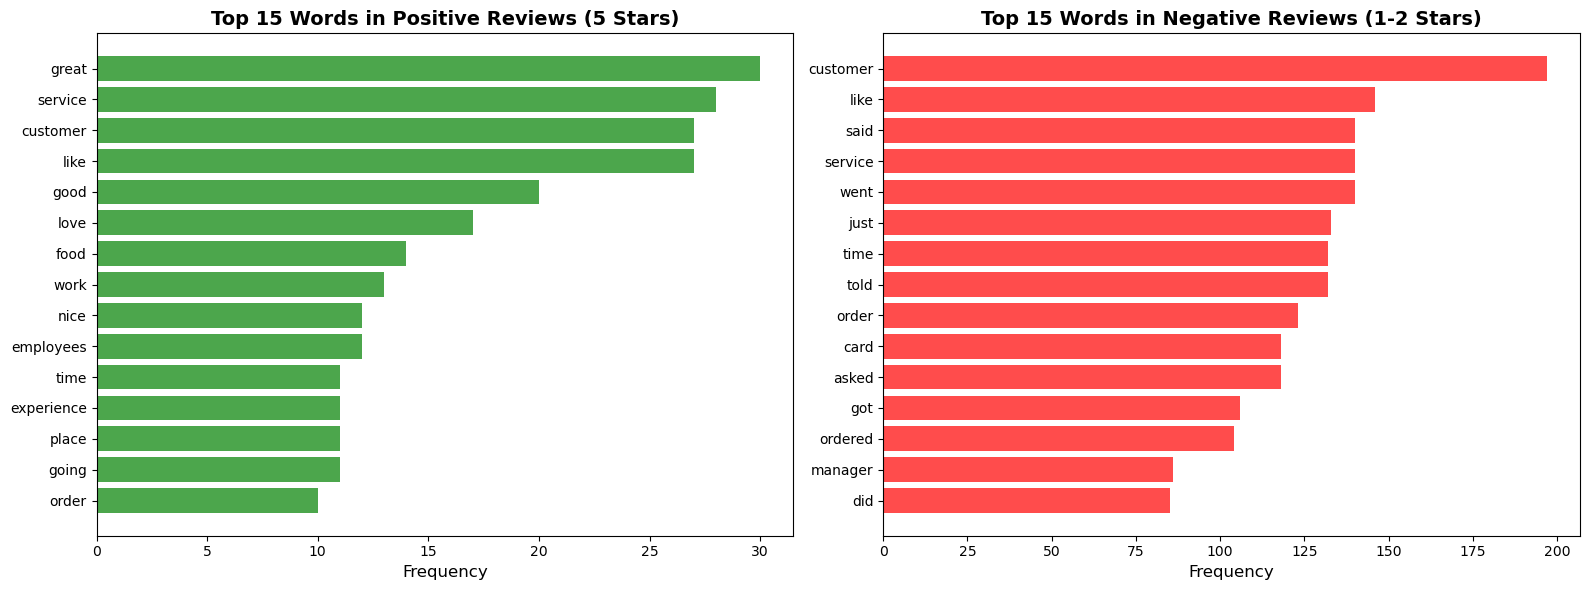

In [7]:
# Get word frequencies for positive and negative reviews
positive_word_freq = Counter(positive_words)
positive_common = positive_word_freq.most_common(15)

negative_word_freq = Counter(negative_words)
negative_common = negative_word_freq.most_common(15)

# Create DataFrames for plotting
positive_freq_df = pd.DataFrame(positive_common, columns=['Word', 'Frequency'])
negative_freq_df = pd.DataFrame(negative_common, columns=['Word', 'Frequency'])

# Create side-by-side bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Positive reviews
ax1.barh(positive_freq_df['Word'], positive_freq_df['Frequency'], color='green', alpha=0.7)
ax1.set_xlabel('Frequency', fontsize=12)
ax1.set_title('Top 15 Words in Positive Reviews (5 Stars)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Negative reviews
ax2.barh(negative_freq_df['Word'], negative_freq_df['Frequency'], color='red', alpha=0.7)
ax2.set_xlabel('Frequency', fontsize=12)
ax2.set_title('Top 15 Words in Negative Reviews (1-2 Stars)', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

**Analysis:** The frequency comparison quantifies what the word clouds suggested. In positive reviews, "great" and "service" appear most frequently, followed by "customer" and "like", showing that efficient, friendly service is key to satisfaction. For negative reviews, "customer" appears over 200 times (mostly in complaints), followed by "like" (used sarcastically), "said" (quoting unhelpful staff), and "service" (in negative contexts). Words like "order", "card", and "asked" appearing frequently in negative reviews suggest order accuracy and payment system issues are significant pain points that frustrate customers.

## Visualization 3: Sentiment Analysis - Rating vs Review Length

Using TextBlob to calculate sentiment polarity and see how it relates to review length and star ratings.

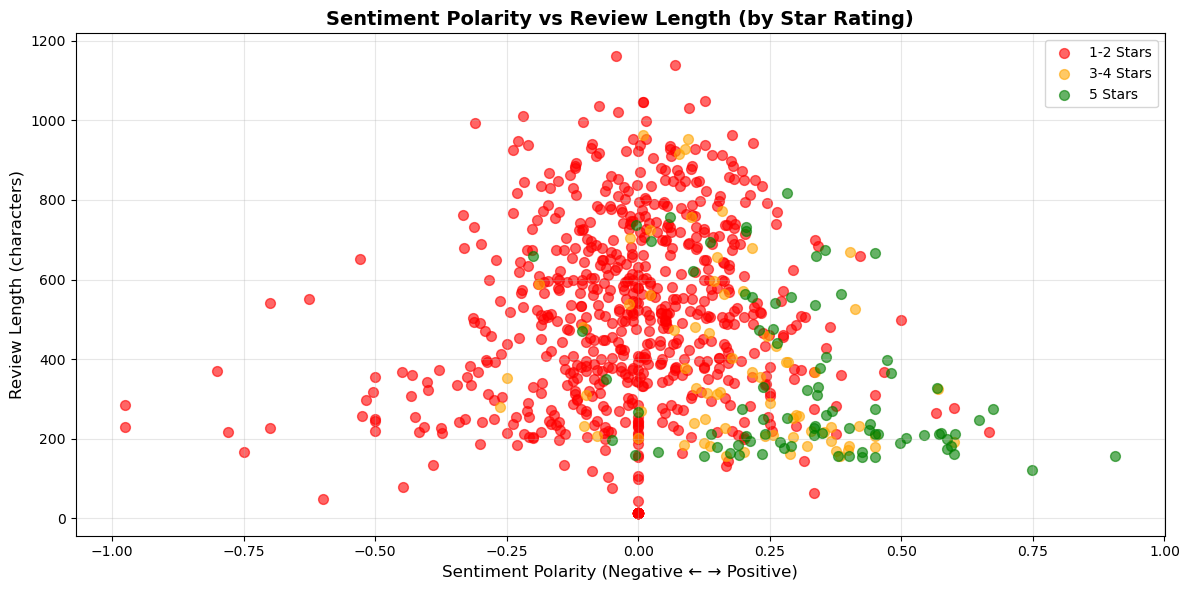

In [9]:
from textblob import TextBlob

# Calculate sentiment and review length
df['sentiment'] = df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['review_length'] = df['Review'].apply(lambda x: len(str(x)))

# Create sentiment category for coloring
df['Rating_Category'] = df['Rating'].apply(lambda x: '5 Stars' if x == 5 
                                            else '3-4 Stars' if x >= 3 
                                            else '1-2 Stars')

# Create scatter plot with matplotlib for better GitHub compatibility
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each rating category with different colors
for category, color in [('1-2 Stars', 'red'), ('3-4 Stars', 'orange'), ('5 Stars', 'green')]:
    mask = df['Rating_Category'] == category
    ax.scatter(df[mask]['sentiment'], df[mask]['review_length'], 
               c=color, label=category, alpha=0.6, s=50)

ax.set_xlabel('Sentiment Polarity (Negative ← → Positive)', fontsize=12)
ax.set_ylabel('Review Length (characters)', fontsize=12)
ax.set_title('Sentiment Polarity vs Review Length (by Star Rating)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis:** This scatter plot reveals interesting patterns in customer review behavior. The TextBlob sentiment scores generally align with star ratings - green dots (5 stars) cluster on the positive side while red dots (1-2 stars) cluster on the negative side. However, there's notable variance, with some 5-star reviews showing neutral sentiment scores, likely because customers focus on factual descriptions rather than emotional language. Review length varies widely, but extremely negative reviews (far left) tend to be longer, suggesting that angry customers write detailed complaints to explain their frustration. The middle-rated reviews (orange) spread across the sentiment spectrum, showing that 3-4 star experiences generate mixed feelings that don't fit neatly into positive or negative categories.